# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('news_api')

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_top_headlines = newsapi.get_top_headlines(q='bitcoin',                                           
                                                  category='business',                                
                                                  language='en',                                          
                                                  country='us'
)

bitcoin_articles = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by= "relevancy"
)
bitcoin_articles['articles'][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Jonathan Shieber',
 'title': 'Casa pivots to provide self-custody services to secure bitcoin',
 'description': 'Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbase. “With self-custody using Casa it’s impossible to be hacke…',
 'url': 'http://techcrunch.com/2020/08/06/casa-pivots-to-provide-self-custody-services-to-secure-bitcoin/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/06/GettyImages-1050523528.jpg?w=600',
 'publishedAt': '2020-08-06T18:25:29Z',
 'content': 'Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbas… [+1571 chars]'}

In [5]:
print(f"Total articles: {bitcoin_articles['totalResults']}")

Total articles: 4238


In [6]:
# Fetch the Ethereum news articles
ethereum_top_headlines = newsapi.get_top_headlines(q='ethereum',                                           
                                                  category='business',                                
                                                  language='en',                                          
                                                  country='us'
)

ethereum_articles = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by= "relevancy"
)
ethereum_articles['articles'][0]

{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Stan Schroeder',
 'title': 'Crypto wallet MetaMask finally launches on iOS and Android, and it supports Apple Pay',
 'description': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ethereum and its ecosystem, making it easy to connect with a dece…",
 'url': 'https://mashable.com/article/metamask-ios-android/',
 'urlToImage': 'https://mondrian.mashable.com/2020%252F09%252F02%252Ffd%252Fe724b5edb4b644dba45958e17ad591e1.6b9c6.png%252F1200x630.png?signature=xIKBM112GVhTA9mUq0DRjCVGWSE=',
 'publishedAt': '2020-09-02T16:00:00Z',
 'content': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]"}

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles['articles']:
    try:
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        neg = sentiment['neg']
        neu = sentiment['neu']
        pos = sentiment['pos']
        
        
        bitcoin_sentiments.append({
            'Compound': compound,
            'Negative': neg,
            'Neutral': neu,
            'Positive': pos,
            'text': text
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame.from_dict(bitcoin_sentiments)
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.5994,0.000,0.851,0.149,"Casa, a Colorado-based provider of bitcoin sec..."
1,0.0000,0.000,1.000,0.000,"In April, the Secret Service seized 100 Bitcoi..."
2,-0.0516,0.071,0.864,0.065,"The question still remained, though, whether a..."
3,0.5106,0.000,0.878,0.122,A ransomware variant called NetWalker is doing...
4,0.2732,0.000,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_articles['articles']:
    try:
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        neg = sentiment['neg']
        neu = sentiment['neu']
        pos = sentiment['pos']
        
        
        ethereum_sentiments.append({
            'Compound': compound,
            'Negative': neg,
            'Neutral': neu,
            'Positive': pos,
            'text': text
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame.from_dict(ethereum_sentiments)
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.7506,0.000,0.791,0.209,If you've interacted with cryptocurrencies in ...
1,0.0000,0.000,1.000,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...
2,0.7579,0.000,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...
3,0.0000,0.000,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...
4,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,98.000000,98.000000,98.000000,98.000000
mean,0.173117,0.043796,0.878255,0.077969
std,0.448456,0.065946,0.075291,0.057924
min,-0.865800,0.000000,0.588000,0.000000
25%,-0.089925,0.000000,0.838500,0.029000
50%,0.279850,0.000000,0.889500,0.090000
75%,0.507000,0.085000,0.910000,0.120250
max,0.790100,0.294000,1.000000,0.222000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,94.000000,94.000000,94.000000,94.000000
mean,0.066531,0.045670,0.892681,0.061649
std,0.432434,0.067226,0.086459,0.069621
min,-0.910000,0.000000,0.689000,0.000000
25%,-0.123025,0.000000,0.840250,0.000000
50%,0.000000,0.000000,0.909000,0.056500
75%,0.416600,0.075000,0.988000,0.090750
max,0.851900,0.309000,1.000000,0.311000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has a slightly higher mean positive score of 0.064.

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score of 0.82.

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score of 0.31.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
lemmatizer = WordNetLemmatizer()
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    # Create a list of the words
    sw_addons = {'thing', 'char', 'fucking'}
    # Convert the words to lowercase
    regex = re.sub("[^a-zA-Z ]", '', str(text))
    # Remove the punctuation
    words = word_tokenize(regex)
    # Remove the stop words
    sw = set(stopwords.words('english'))
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens


In [14]:
# Create a new tokens column for bitcoin
bitcoin_tokens = []

for text in bitcoin_df['text']:
    tokenize = (tokenizer(text))
    bitcoin_tokens.append({'Tokens': tokenize})
    
bitcoin_token_df = pd.DataFrame.from_dict(bitcoin_tokens)
bitcoin_df['Tokens'] = bitcoin_token_df
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text,Tokens
0,0.5994,0.000,0.851,0.149,"Casa, a Colorado-based provider of bitcoin sec...","[casa, coloradobased, provider, bitcoin, secur..."
1,0.0000,0.000,1.000,0.000,"In April, the Secret Service seized 100 Bitcoi...","[april, secret, service, seized, bitcoins, cla..."
2,-0.0516,0.071,0.864,0.065,"The question still remained, though, whether a...","[question, still, remained, though, whether, g..."
3,0.5106,0.000,0.878,0.122,A ransomware variant called NetWalker is doing...,"[ransomware, variant, called, netwalker, surpr..."
4,0.2732,0.000,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...,"[covid, pandemic, ha, resulted, mass, shift, w..."


In [15]:
# Create a new tokens column for ethereum
ethereum_tokens = []

for text in ethereum_df['text']:
    tokenize = (tokenizer(text))
    ethereum_tokens.append({'Tokens': tokenize})
    
ethereum_tokens_df = pd.DataFrame.from_dict(ethereum_tokens)
ethereum_df['Tokens'] = ethereum_tokens_df
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text,Tokens
0,0.7506,0.000,0.791,0.209,If you've interacted with cryptocurrencies in ...,"[youve, interacted, cryptocurrencies, past, co..."
1,0.0000,0.000,1.000,0.000,TL;DR: The Mega Blockchain Mastery Bundle is o...,"[tldr, mega, blockchain, mastery, bundle, sale..."
2,0.7579,0.000,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...,"[london, reuters, sound, like, surefire, bet, ..."
3,0.0000,0.000,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...,"[new, york, reuters, brooklynbased, technology..."
4,-0.2677,0.074,0.881,0.045,An outspoken Bitcoin whale who rarely shows af...,"[outspoken, bitcoin, whale, rarely, show, affe..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [71]:
# Generate the Bitcoin N-grams where N=2=
Counter(ngrams(tokenizer(bitcoin_df.text.str.cat()), 2)).most_common(20)

[(('satoshi', 'nakaboto'), 44),
 (('charsour', 'robot'), 22),
 (('robot', 'colleague'), 22),
 (('colleague', 'satoshi'), 22),
 (('nakaboto', 'writes'), 22),
 (('writes', 'bitcoin'), 22),
 (('every', 'daywelcome'), 22),
 (('daywelcome', 'another'), 22),
 (('another', 'edition'), 22),
 (('edition', 'bitcoin'), 22),
 (('bitcoin', 'today'), 22),
 (('today', 'satoshi'), 22),
 (('nakaboto', 'tell'), 22),
 (('tell', 'whats'), 22),
 (('whats', 'going'), 22),
 (('going', 'bitcoin'), 22),
 (('bitcoin', 'btc'), 20),
 (('btc', 'every'), 19),
 (('bitcoin', 'charsour'), 16),
 (('wireless', 'charging'), 12)]

In [28]:
# Generate the Ethereum N-grams where N=2
Counter(ngrams(tokenizer(ethereum_df.text.str.cat()), 2)).most_common(20)

[(('finance', 'defi'), 10),
 (('decentralized', 'finance'), 9),
 (('btc', 'trading'), 7),
 (('trading', 'around'), 7),
 (('ethereum', 'blockchain'), 6),
 (('ethereum', 'classic'), 6),
 (('around', 'utc'), 5),
 (('utc', 'pm'), 5),
 (('pm', 'et'), 5),
 (('et', 'slipping'), 5),
 (('price', 'bitcoin'), 4),
 (('charsethereum', 'classic'), 4),
 (('ethereum', 'miner'), 4),
 (('slipping', 'previous'), 3),
 (('alltime', 'high'), 3),
 (('charsdecentralized', 'finance'), 3),
 (('readingblockchain', 'bites'), 3),
 (('omg', 'network'), 3),
 (('second', 'attack'), 3),
 (('blockchain', 'ha'), 3)]

In [29]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [43]:
# Get the top 10 words for Bitcoin
token_count(tokenizer(bitcoin_df.text.str.cat()))

[('bitcoin', 81),
 ('satoshi', 44),
 ('nakaboto', 44),
 ('every', 23),
 ('another', 23),
 ('edition', 23),
 ('today', 23),
 ('tell', 23),
 ('going', 23),
 ('charsour', 22)]

In [44]:
# Get the top 10 words for Ethereum
token_count(tokenizer(ethereum_df.text.str.cat()))

[('ethereum', 45),
 ('ha', 25),
 ('network', 20),
 ('blockchain', 17),
 ('bitcoin', 17),
 ('defi', 16),
 ('charsethereum', 15),
 ('cryptocurrency', 13),
 ('exchange', 13),
 ('trading', 12)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

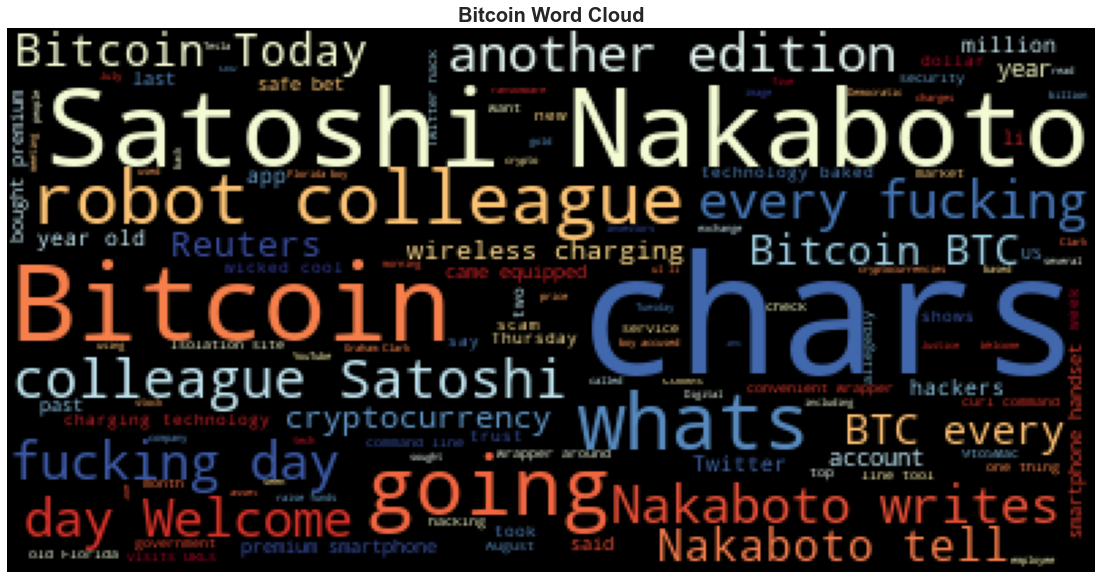

In [58]:
# Generate the Bitcoin word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(bitcoin_df.text.str.cat())
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

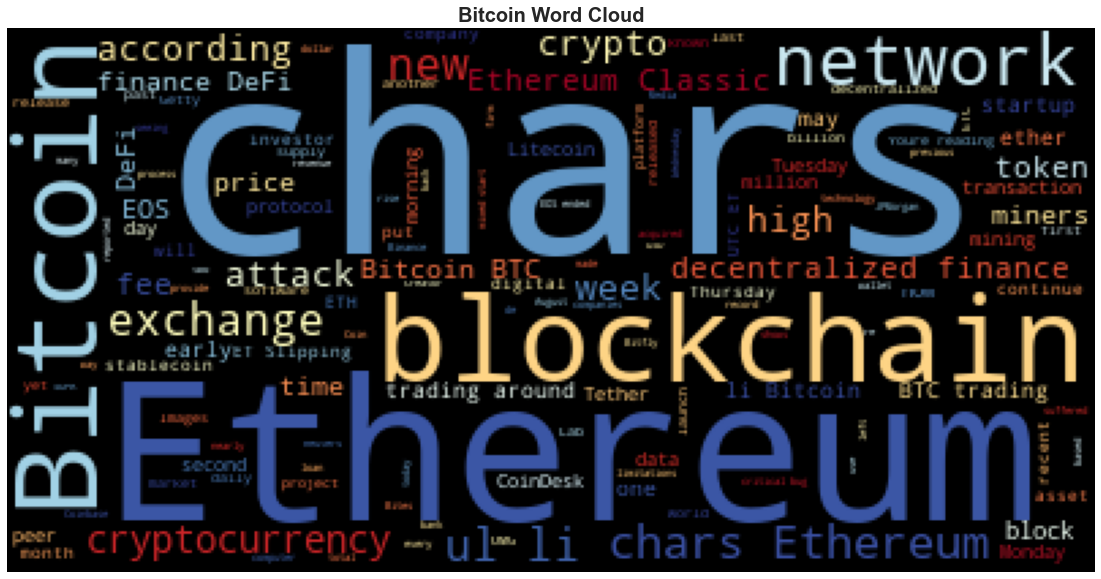

In [59]:
# Generate the Ethereum word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(ethereum_df.text.str.cat())
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [60]:
import spacy
from spacy import displacy

In [61]:
# Download a language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [62]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [65]:
# Concatenate all of the bitcoin text together
all_bit = bitcoin_df.text.str.cat()

In [70]:
# Run the NER processor on all of the text
doc = nlp(all_bit)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [69]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Casa ORG
Colorado GPE
Coinbas ORG
April DATE
the Secret Service ORG
100 CARDINAL
Bitcoins ORG
Clark GPE
Weeks later DATE
Bennett PERSON
the Secret Service ORG
100 CARDINAL
months DATE
Guy PERSON
NetWalker ORG
Bitcoin GPE
$25 million MONEY
the last five DATE
VPN PRODUCT
Reddit ORG
over dozens CARDINAL
Friday DATE
afternoon TIME
pro-Donald Trump PERSON
Reuters ORG
Bitcoin GPE
over a year DATE
Monday DATE
2020 DATE
March DATE
4.4% PERCENT
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Wednesday DATE
17-year-old DATE
Florida GPE
Twitter ORG
last month DATE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto ORG
Bitcoin

---

## Ethereum NER

In [72]:
# Concatenate all of the ethereum text together
all_eth = ethereum_df.text.str.cat()

In [73]:
# Run the NER processor on all of the text
doc = nlp(all_eth)

# Add a title to the document
doc.user_data["title"] = "Eth NER"
# Render the visualization
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)